In [1]:
from tensorflow import kerasras

In [4]:
# 이전에 저장해 놓은 CNN 모델 읽어 들이기
# best_cnn_model.h5 읽어들이고 계층구조 확인
model = keras.models.load_model("./model/best_cnn_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [5]:
# CNN 층 확인해보기
# 리스트에 담겨져 있음
model.layers

In [7]:
# 0번째 계층추출해 conv 변수에 저장
conv = model.layers[0]
conv

In [8]:
# 0번째 layer의 가중치 확인
# shape(3,3,1,32) : 현재 계층의 차원
# 3, 3 : 커널사이즈 (3행 3열)
# 1 : 검정색
# 32 : 필터개수
# numpy : 가중치 값들
conv.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-2.70715747e-02, -3.64334673e-01,  1.44923940e-01,
           -5.53468585e-01,  1.71300903e-01, -2.40872189e-01,
           -3.34729031e-02, -2.07436122e-02,  3.46671283e-01,
           -1.63056791e-01, -1.78918928e-01, -1.23954348e-01,
            1.12633258e-01,  3.74692291e-01, -2.39041567e-01,
           -4.13367152e-01,  2.37786904e-01,  2.46989354e-01,
            1.67084500e-01, -9.78244096e-02,  5.92538305e-02,
           -1.85600251e-01,  1.16631880e-01,  2.50530422e-01,
            1.97506715e-02, -1.41533151e-01,  2.21208129e-02,
           -2.91475147e-01, -2.05408409e-01, -3.97425261e-04,
            9.55234692e-02,  1.62790537e-01]],
 
         [[-3.04339349e-01, -1.45092952e+00, -1.63612306e-01,
           -1.09460676e+00, -1.79750949e-01,  2.10777223e-01,
           -1.16976447e-01,  1.12321533e-01, -2.96708316e-01,
            4.28241938e-02,  5.56181073e-02,  1.41368151e-01,
         

In [12]:
# 0번째 layer의 입력 가중치와 target 가중치 값 확인
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [13]:
# 입력에 대한 가중치 조회
conv_weights =conv.weights[0].numpy()
conv_weights

array([[[[-2.70715747e-02, -3.64334673e-01,  1.44923940e-01,
          -5.53468585e-01,  1.71300903e-01, -2.40872189e-01,
          -3.34729031e-02, -2.07436122e-02,  3.46671283e-01,
          -1.63056791e-01, -1.78918928e-01, -1.23954348e-01,
           1.12633258e-01,  3.74692291e-01, -2.39041567e-01,
          -4.13367152e-01,  2.37786904e-01,  2.46989354e-01,
           1.67084500e-01, -9.78244096e-02,  5.92538305e-02,
          -1.85600251e-01,  1.16631880e-01,  2.50530422e-01,
           1.97506715e-02, -1.41533151e-01,  2.21208129e-02,
          -2.91475147e-01, -2.05408409e-01, -3.97425261e-04,
           9.55234692e-02,  1.62790537e-01]],

        [[-3.04339349e-01, -1.45092952e+00, -1.63612306e-01,
          -1.09460676e+00, -1.79750949e-01,  2.10777223e-01,
          -1.16976447e-01,  1.12321533e-01, -2.96708316e-01,
           4.28241938e-02,  5.56181073e-02,  1.41368151e-01,
          -1.66998932e-03, -2.82181978e-01, -8.54839459e-02,
           2.92896748e-01, -2.28988491

In [15]:
# 가중치의 전체 평균
conv_weights.mean()

-0.044901147

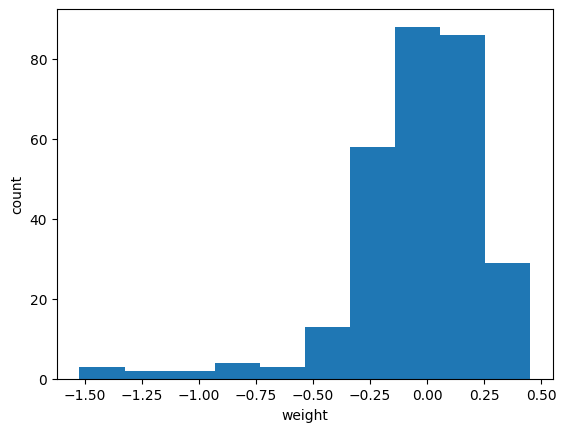

In [18]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
# 데이터는 모두 1차원으로 만들어야 그릴 수 있다
conv_weights.shape
conv_weights.reshape(-1,1)

# 시각화
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

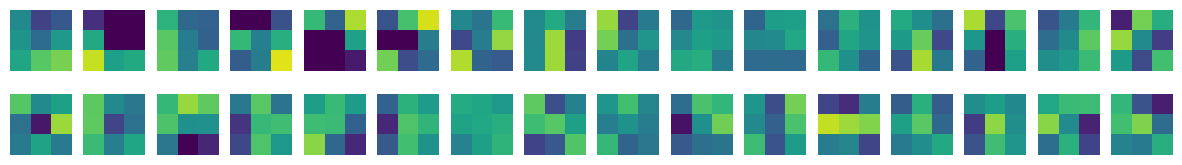

In [23]:
# 
conv_weights.shape
conv_weights[:,:,0,:]

# 1개 이미지의 특징(가중치) 그려보기
# 2행 16열로 그리기, 전체 그래프 사이즈는 너비 15 높이 2
fig, axs = plt.subplots(2,16, figsize=(15,2))
for i in range(2) :
    for j in range(16) :
        ### 각 행렬에 픽셀 특징 그리기 
        # - vmin과 vmax는 픽셀의 최대/최소값을 지정하여
        #   컬러맵으로 표현할 범위 지정(색상의 밝기)
        axs[i,j].imshow(conv_weights[:,:,0,i*16 + j],
                        vmin=-0.5, vmax=0.5)
        
        ### x,y축 좌표 숨기기
        axs[i,j].axis("off")
        
plt.show()

In [24]:
# 새 모델 생성
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,
                                         activation="relu",
                                         padding="same",
                                         input_shape=(28,28,1)))

In [25]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [26]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.0030666366 0.08521569


In [28]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [29]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)